In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print function to display the lat/long combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-49.371693761850906 79.64097465420338
-46.59306008120376 -49.690132995716624
33.77276694464456 -134.58591776950234
27.48386852506914 175.65712557989787
82.18736333450047 -158.54060396714465
-79.60144465049906 10.206524599783535
-58.55760492352352 58.20188512904625
-16.921874362816865 171.60106829062698
49.46138358267089 -99.37216635327916
-52.26105594452126 62.23708362205454
-81.61493774787158 -95.87043487089183
50.194861086645744 -162.22988963007936
-14.106894492604496 -123.53888167472236
81.48164387503357 149.92992747016922
-21.933564493786264 87.34223990840547
-12.532774310716988 -65.74086650130756
-17.579548791289326 -32.510382308062105
84.42273272162643 48.779057178365406
-25.429958046132484 97.7364440166877
-19.846582232008302 -64.06280019813913
-10.37274027791051 -62.027240650142176
-27.884003278519337 -137.58186077053392
-76.12618530365378 -47.658877531867034
-7.49292326957999 129.96364232588087
-29.328813397672484 -64.87316476483639
72.33954307190356 -49.68175113559721
-35.899

In [5]:
from citipy import citipy

In [6]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each lat/long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we will add it to cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient total
len(cities)

629

In [7]:
# 6.2.6 Get City Weather Data - mult cities
import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
# Create empty list to hold weather data
city_data = []

# Build basic url 
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

In [9]:
# Print the beginning of the logging
print("Beginning data retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    

  
    # Log the URL, record, and set numbers, and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
    
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]

        city_clouds =  city_weather["clouds"]["all"]

        city_wind = city_weather["wind"]["speed"]

        city_country = city_weather["sys"]["country"]

        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M%S")

         # Append the city information into city_data list

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Clouds": city_clouds,
                          "Wind": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    

# If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
    
# Indicate that data loading is complete
print("-----------------------------")
print("Data retrieval complete      ")
print("-----------------------------")
                             


Beginning data retrieval     
-----------------------------
Processing record 1 of Set 1 | mahebourg
Processing record 2 of Set 1 | mar del plata
Processing record 3 of Set 1 | fortuna
Processing record 4 of Set 1 | butaritari
Processing record 5 of Set 1 | barrow
Processing record 6 of Set 1 | hermanus
Processing record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing record 8 of Set 1 | vila
Processing record 9 of Set 1 | killarney
Processing record 10 of Set 1 | punta arenas
Processing record 11 of Set 1 | bethel
Processing record 12 of Set 1 | rikitea
Processing record 13 of Set 1 | chokurdakh
Processing record 14 of Set 1 | bengkulu
Processing record 15 of Set 1 | rodrigues alves
Processing record 16 of Set 1 | belmonte
Processing record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing record 18 of Set 1 | carnarvon
Processing record 19 of Set 1 | monteagudo
Processing record 20 of Set 1 | ouro preto do oeste
Processing record 21 of Set 1 | ushuaia
P

In [10]:
len(city_data)

590

In [11]:
# Convert the array of dictionaries to a Pd DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Mahebourg,-20.4081,57.7000,71.89,73,75,11.50,MU,2022-10-11 20:0108
1,Mar Del Plata,-38.0023,-57.5575,60.82,82,0,18.99,AR,2022-10-11 20:0332
2,Fortuna,40.5982,-124.1573,65.32,76,20,8.05,US,2022-10-11 20:0450
3,Butaritari,3.0707,172.7902,81.97,79,20,20.33,KI,2022-10-11 20:0450
4,Barrow,71.2906,-156.7887,30.22,93,75,26.46,US,2022-10-11 20:0300
5,Hermanus,-34.4187,19.2345,64.80,97,100,3.49,ZA,2022-10-11 20:0451
6,Vila,42.0304,-8.1588,58.08,85,65,2.15,PT,2022-10-11 20:0452
7,Killarney,52.0500,-9.5167,52.88,92,99,8.61,IE,2022-10-11 20:0048
8,Punta Arenas,-53.1500,-70.9167,37.51,93,75,27.63,CL,2022-10-11 20:0145
9,Bethel,41.3712,-73.4140,70.34,52,0,5.75,US,2022-10-11 20:0320


In [13]:
reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind"]
city_data_df = city_data_df[reorder]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind
0,Mahebourg,MU,2022-10-11 20:0108,-20.4081,57.7000,71.89,73,75,11.50
1,Mar Del Plata,AR,2022-10-11 20:0332,-38.0023,-57.5575,60.82,82,0,18.99
2,Fortuna,US,2022-10-11 20:0450,40.5982,-124.1573,65.32,76,20,8.05
3,Butaritari,KI,2022-10-11 20:0450,3.0707,172.7902,81.97,79,20,20.33
4,Barrow,US,2022-10-11 20:0300,71.2906,-156.7887,30.22,93,75,26.46
...,...,...,...,...,...,...,...,...,...
585,Ennis,IE,2022-10-11 20:2250,52.8436,-8.9864,53.53,82,75,11.50
586,Enshi,CN,2022-10-11 20:2251,30.3000,109.4833,51.85,89,12,0.40
587,Puerto Quijarro,BO,2022-10-11 20:2251,-17.7833,-57.7667,84.27,59,100,1.92
588,Saint Anthony,US,2022-10-11 20:2252,45.0205,-93.2180,80.96,43,20,25.32


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export city_data into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [17]:
# 6.3.1 get data to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Clouds"]
wind_speed = city_data_df["Wind"]

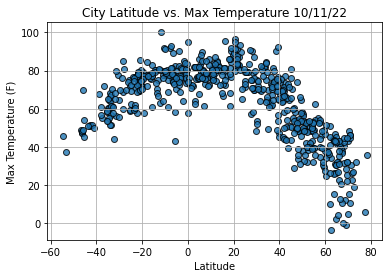

In [21]:
# Import time module
import time

# Build the scatter plot for lat v max temp
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

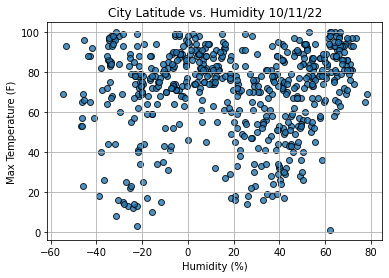

In [22]:
# Build the scatter plot for lat v humidity
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

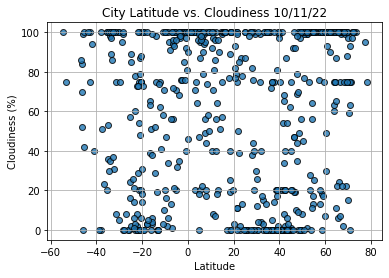

In [24]:
# Build the scatter plot for lat v cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plot for lat v wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()